In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import tools

# pyforce

In [5]:
import sys
sys.path.append('../research/pyforce/')

In [112]:
from importlib import reload

import pyforce
pyforce = reload(pyforce)

In [113]:
pdist = pyforce.Distances(X_train)

In [114]:
emb = np.random.random((X_train.shape[0], 2))
fe_rnd = pyforce.ForceEmbedding(emb, pdist)

In [115]:
%timeit fe_rnd.stress()

41 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [116]:
%timeit fe_rnd.stress_vec()

130 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [117]:
fe_rnd.stress()

3155090.9422359522

In [118]:
fe_rnd.stress_vec()

3155090.9422359522

In [88]:
import scipy.spatial as ss

In [93]:
pdist = ss.distance.pdist(emb)
ld_ij_2 = ss.distance.squareform(pdist)

In [94]:
ld_ij_2

array([[0.        , 0.57857633, 1.01676194, ..., 0.31219218, 0.71002144,
        0.59213612],
       [0.57857633, 0.        , 0.59436198, ..., 0.26882861, 0.55005158,
        0.05697581],
       [1.01676194, 0.59436198, 0.        , ..., 0.74708704, 0.41461771,
        0.63831962],
       ...,
       [0.31219218, 0.26882861, 0.74708704, ..., 0.        , 0.53356584,
        0.29038407],
       [0.71002144, 0.55005158, 0.41461771, ..., 0.53356584, 0.        ,
        0.60701897],
       [0.59213612, 0.05697581, 0.63831962, ..., 0.29038407, 0.60701897,
        0.        ]])

In [95]:
X = emb[:, None, :]
ld_ij_2 = ((X - X.swapaxes(0,1)).sum(axis=2) **2) 

In [96]:
ld_ij_2

array([[0.00000000e+00, 6.34462850e-01, 1.88829067e+00, ...,
        1.90820205e-01, 6.59512342e-01, 6.29585624e-01],
       [6.34462850e-01, 0.00000000e+00, 3.33643856e-01, ...,
        1.29385560e-01, 2.42483716e-04, 9.40922136e-06],
       [1.88829067e+00, 3.33643856e-01, 0.00000000e+00, ...,
        8.78570975e-01, 3.15897098e-01, 3.37196895e-01],
       ...,
       [1.90820205e-01, 1.29385560e-01, 8.78570975e-01, ...,
        0.00000000e+00, 1.40830524e-01, 1.27188236e-01],
       [6.59512342e-01, 2.42483716e-04, 3.15897098e-01, ...,
        1.40830524e-01, 0.00000000e+00, 3.47424774e-04],
       [6.29585624e-01, 9.40922136e-06, 3.37196895e-01, ...,
        1.27188236e-01, 3.47424774e-04, 0.00000000e+00]])

In [99]:
np.linalg.norm((X - X.swapaxes(0,1)), axis=2)

array([[0.        , 0.57857633, 1.01676194, ..., 0.31219218, 0.71002144,
        0.59213612],
       [0.57857633, 0.        , 0.59436198, ..., 0.26882861, 0.55005158,
        0.05697581],
       [1.01676194, 0.59436198, 0.        , ..., 0.74708704, 0.41461771,
        0.63831962],
       ...,
       [0.31219218, 0.26882861, 0.74708704, ..., 0.        , 0.53356584,
        0.29038407],
       [0.71002144, 0.55005158, 0.41461771, ..., 0.53356584, 0.        ,
        0.60701897],
       [0.59213612, 0.05697581, 0.63831962, ..., 0.29038407, 0.60701897,
        0.        ]])

In [85]:
fe_rnd.stress_vec()

ForceEmbedding(3227914.68581252)

The expression for the stress to optimise is:

$stress(X) = \sum_{i<j}w_{ij}(||X_i - X_j|| - d_{ij})^2$

$w_{ij} = d_{ij}^{-2}$

$||X_i - X_j||$ is a norm computed in the low-dimensional embedding and $d_{ij}$ is the pairwise distance in the high-dimensional embedding.

The gradient for this cost is equal to:

$grad_i(stress(X_i)) = \sum_j \frac{||X_i - X_j|| - d_{ij}}{||X_i - X_j|| * d_{ij}^2} * (X_i - X_j)$

An optimisation can take place where gradient descent is for example used.

# MNIST 2k

We start with the small version of the dataset MNIST:

<table>
    <tr>
        <th># of samples</th>
        <th># of classes</th>
        <th>dimensions</th>
    </tr>
    <tr>
        <td>1797</td>
        <td>10</td>
        <td>64</td>
    </tr>
</table>

This dataset is small enough to allow for a simple computation of the forces/gradient without requiring to prune the number of neighbhours taken into consideration.

In [69]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-2k')

and compute the pairwise distances:

In [70]:
pdist = pyforce.Distances(X_train)

We will look at two different type of initialisation and compute the stress for each initial embeddings:

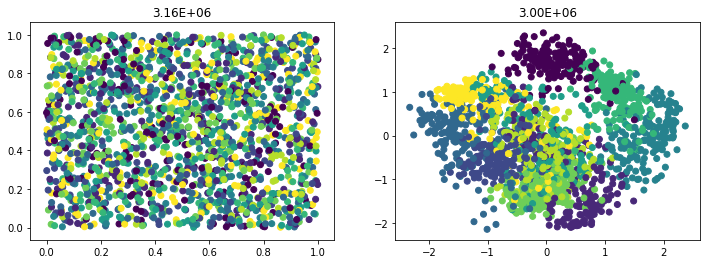

In [71]:
emb = np.random.random((X_train.shape[0], 2))
fe_rnd = pyforce.ForceEmbedding(emb, pdist)

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_train)
from sklearn import preprocessing
pca = preprocessing.scale(pca)
fe_pca = pyforce.ForceEmbedding(pca, pdist)

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(emb[:,0], emb[:,1], c=y_train)
ax[0].set_title("{:.2E}".format(fe_rnd.stress()))

ax[1].scatter(pca[:,0], pca[:,1], c=y_train)
_=ax[1].set_title("{:.2E}".format(fe_pca.stress()))

We can now optimise the layout for 100 iterations and plot the stress throughout:

In [72]:
%time res = fe_rnd.optimize(n_iter=100)

CPU times: user 1min 24s, sys: 7.63 s, total: 1min 31s
Wall time: 23 s


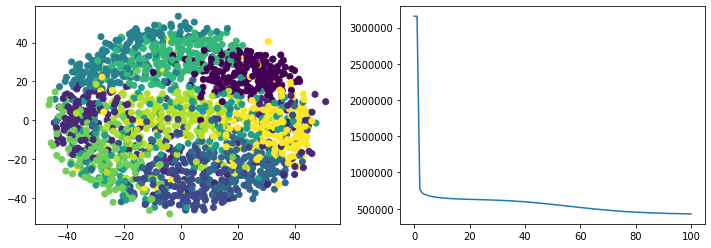

In [73]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(fe_rnd[:,0], fe_rnd[:,1], c=y_train)
ax[1].plot(np.array(fe_rnd.error))

In [74]:
%time res = fe_pca.optimize(n_iter=100, method='sgd')

CPU times: user 1min 23s, sys: 7.38 s, total: 1min 31s
Wall time: 22.9 s


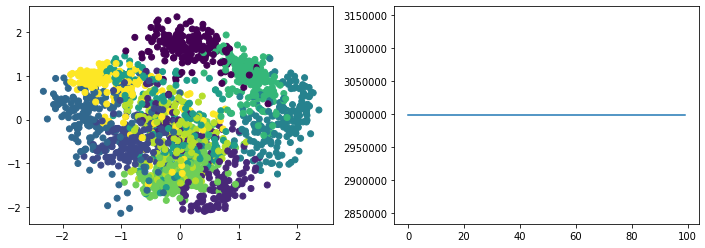

In [75]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(fe_pca[:,0], fe_pca[:,1], c=y_train)
ax[1].plot(np.array(fe_pca.error[1:]))

# MNIST 70k

We can now look at the bigger version of the MNIST dataset. We have now:

<table>
    <tr>
        <th># of samples</th>
        <th># of classes</th>
        <th>dimensions</th>
    </tr>
    <tr>
        <td>70000</td>
        <td>10</td>
        <td>784</td>
    </tr>
</table>

This is too much data to compute the full pairwise distance in memory. The resulting matrix naively computed would be 70kx70k. We can however take a sample of the data - of size $\sqrt{N}$ for example, use the force layout to compute an embedding on the subset and use interpolation on the rest ($N - \sqrt{N}$ samples).

In [14]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-70k')

and compute the pairwise distances:

## step 1 - sample $\sqrt{N}$

In [48]:
N = X_train.shape[0]
rootN = np.int(np.sqrt(N))
rootN = np.max((np.int(np.sqrt(N)), 2000))

In [49]:
rootN_ids = np.random.choice(N, size=rootN, replace=False)

In [50]:
rootN_data = X_train[rootN_ids]

In [51]:
pdist = pyforce.Distances(rootN_data)

## step 2 - force-based layout

In [52]:
pca = PCA(n_components=2).fit_transform(rootN_data)
from sklearn import preprocessing
pca = preprocessing.scale(pca)

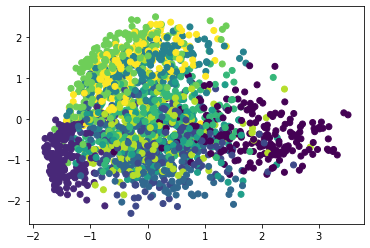

In [53]:
plt.scatter(pca[:,0], pca[:,1], c=y_train[rootN_ids], rasterized=True)

In [54]:
fe_pca = pyforce.ForceEmbedding(pca, pdist)

In [67]:
%time res = fe_pca.optimize(n_iter=1000)#, method='sgd')

CPU times: user 16min 50s, sys: 2min 51s, total: 19min 41s
Wall time: 5min 21s


(0, 3992613.073672615)

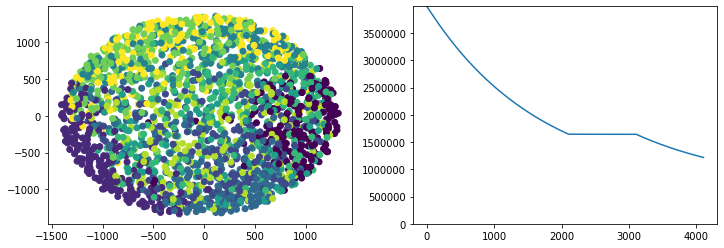

In [68]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(fe_pca[:,0], fe_pca[:,1], c=y_train[rootN_ids])
ax[1].plot(np.array(fe_pca.error))
ax[1].set_ylim([0, np.max(fe_pca.error)])

In [46]:
pdist.shape

(3000, 3000)

(array([1.00200e+03, 3.38000e+02, 2.30800e+03, 7.14400e+03, 4.84700e+04,
        2.43522e+05, 4.45192e+05, 2.23872e+05, 2.77720e+04, 3.80000e+02]),
 array([   0.        ,  404.25113482,  808.50226963, 1212.75340445,
        1617.00453926, 2021.25567408, 2425.5068089 , 2829.75794371,
        3234.00907853, 3638.26021334, 4042.51134816]),
 <a list of 10 Patch objects>)

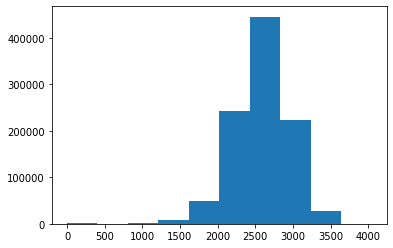

In [31]:
plt.hist(pdist.ravel())

In [ ]:
fe = ForceEmbedding(pca, pdist)

In [ ]:
fe.stress()

In [ ]:
%time res = fe.optimize(1000)

In [ ]:
plt.scatter(res[:,0], res[:,1], c=y_train[rootN_ids], rasterized=True)

In [ ]:
fe_pca.error

In [ ]:
pdist = pyforce.Distances(X_train)

In [ ]:
plt.hist(fe_pca.d_ij.ravel())

In [ ]:
import numpy as np

import scipy.spatial as ss
EPSILON = np.finfo(np.float64).eps


class Distances:

    def __new__(
        self,
        data,
        method='full',
        metric='euclidean',
        # metric_params=None,
        # symmetrize=True,
        # n_jobs=1,dd
        # random_state=None,
    ):
        # compute pairwise distances
        if (method == 'full'):
            pdist = ss.distance.pdist(data, metric)
            distances = ss.distance.squareform(pdist)

        elif method == 'approx':
            # use ANN from pynndescent
            raise NotImplementedError("Method not yet supported. Choice are approx or full.")
        else:
            raise ValueError("Method not supported. Choice are approx or full.")

        return distances

class ForceEmbedding(np.ndarray):

    def __new__(cls,
        embedding,
        pdist,
        # random_state=None,
        # optimizer=None,
        # negative_gradient_method="fft",
        # **gradient_descent_params,
    ):
        obj = np.asarray(embedding, dtype=np.float64, order="C").view(ForceEmbedding)

        # add variables
        obj.d_ij = pdist
        obj.inv_d_ij_2 = 1./(pdist**2 + EPSILON)

        return obj

    def stress(self):
        pdist = ss.distance.pdist(self)
        e_ij_2 = ss.distance.squareform(pdist)
        res = np.sum((e_ij_2 - self.d_ij)**2 * self.inv_d_ij_2)
        return res

    def force(self):
        # d_ij is the distance in high-dimensional space
        # e_ij is the distance in low-dimensional space

        # F_ij = ||Xi-Xj||-d_ij)/||Xi-Xj|| * (Xi-Xj)/d_ij**2
        pdist = ss.distance.pdist(self, 'euclidean')
        e_ij_2 = ss.distance.squareform(pdist)

        # https://stackoverflow.com/questions/32415061/
        a = self[:, None, :]
        e_ij_1 = (a - a.swapaxes(0,1))

        F_ij_2 = (e_ij_2 - self.d_ij) / (e_ij_2 + EPSILON)
        F_ij = F_ij_2[:,:] * self.inv_d_ij_2
        # https://stackoverflow.com/questions/39026173/
        F_ij = F_ij[:,:,None] * e_ij_1

        F_i = np.sum(F_ij, axis=1)
        return F_i

    def optimize(self,
        n_iter,
        learning_rate=200,
        momentum=0.5, exaggeration=None, dof=1, min_gain=0.01,
        min_grad_norm=1e-8, max_grad_norm=None, theta=0.5,
        n_interpolation_points=3, min_num_intervals=50, ints_in_interval=1,
        reference_embedding=None, n_jobs=1,
        use_callbacks=False, callbacks=None, callbacks_every_iters=50
        ):

        update = np.zeros_like(self)
        gains = np.ones_like(self)

        self.error = []
        self.error.append(self.stress())

        for iteration in range(n_iter):

            gradient = self.force()

#             grad_direction_flipped = np.sign(update) != np.sign(gradient)
#             grad_direction_same = np.invert(grad_direction_flipped)
#             gains[grad_direction_flipped] += 0.2
#             gains[grad_direction_same] = gains[grad_direction_same] * 0.8 + min_gain

#             update = momentum * update - learning_rate * gains * gradient

#             self += update
            self -= gradient

            self.error.append(self.stress())

        return self

# random init

In [ ]:
fe = ForceEmbedding(emb, pdist)

In [ ]:
fe.stress()

## PCA init

In [ ]:
emb = np.random.random((X_train.shape[0], 2))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_train)
plt.scatter(pca[:,0], pca[:,1], c=y_train)

In [ ]:
fe = ForceEmbedding(pca, pdist)

In [ ]:
fe.stress()

In [ ]:
%time res = fe.optimize(100)

# Mnist 70k - root N

In [ ]:
plt.scatter(res[:,0], res[:,1], c=y_train)

## step 1 - sample $\sqrt{N}$

In [ ]:
N = X_train.shape[0]
# rootN = np.int(np.sqrt(N))
rootN = np.max((np.int(np.sqrt(N)), 1000))

In [ ]:
rootN_ids = np.random.choice(N, size=rootN, replace=False)

In [ ]:
rootN_data = X_train[rootN_ids]

## step 2 - force-based layout

In [ ]:
pca = PCA(n_components=2).fit_transform(rootN_data)

In [ ]:
from sklearn import preprocessing
pca = preprocessing.scale(pca)

In [ ]:
plt.scatter(pca[:,0], pca[:,1], c=y_train[rootN_ids], rasterized=True)

In [ ]:
pdist = Distances(rootN_data)

In [ ]:
fe = ForceEmbedding(pca, pdist)

In [ ]:
fe.stress()

In [ ]:
%time res = fe.optimize(1000)

In [ ]:
plt.scatter(res[:,0], res[:,1], c=y_train[rootN_ids], rasterized=True)

In [ ]:
plt.plot(np.array(fe.error))

In [ ]:
fe.force()

In [ ]:
from openTSNE import TSNE

In [ ]:
res_tsne = []
tsne = TSNE(n_jobs=8,
            initialization='pca',
            callbacks=lambda it, err, emb: res_tsne.append((it, err)),
            callbacks_every_iters=1,
           )

In [ ]:
%time embd_tsne = tsne.fit(rootN_data)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(embd_tsne[:,0], embd_tsne[:,1], c=y_train[rootN_ids], rasterized=True)

In [ ]:
fe_tsne = ForceEmbedding(embd_tsne, pdist)

In [ ]:
fe_tsne.stress()

In [ ]:
plt.scatter(fe_tsne[:,0], fe_tsne[:,1], c=y_train[rootN_ids], rasterized=True)

In [ ]:
fe_tsne[:,0].shape

In [ ]:
fe.force()

In [ ]:
plt.hist(res.d_ij.ravel())

In [ ]:
from sklearn import preprocessing
res = preprocessing.scale(fe.d_ij, with_mean=False)

In [ ]:
plt.hist(res.ravel())

In [ ]:
pdist = ss.distance.pdist(self, 'euclidean')
e_ij_2 = ss.distance.squareform(pdist)

# https://stackoverflow.com/questions/32415061/
a = self[:, None, :]
e_ij_1 = (a - a.swapaxes(0,1))


F_ij_2 = (e_ij_2 - self.d_ij) / (e_ij_2 + np.finfo(float).eps)
# https://stackoverflow.com/questions/39026173/
F_ij = F_ij_2[:,:,None] * e_ij_1

F_i = np.sum(F_ij, axis=1)
return F_i

In [ ]:
pdist = ss.distance.pdist(fe, 'euclidean')
e_ij_2 = ss.distance.squareform(pdist)

In [ ]:
e_ij_2

In [ ]:
a = fe[:, None, :]
e_ij_1 = (a - a.swapaxes(0,1))

In [ ]:
e_ij_1

In [ ]:
F_ij_2 = (e_ij_2 - fe.d_ij) / (e_ij_2 + np.finfo(float).eps)

In [ ]:
F_ij_2

In [ ]:
F_ij = F_ij_2[:,:,None] * e_ij_1

In [ ]:
F_ij

In [ ]:
F_i = np.sum(F_ij, axis=1)

In [ ]:
F_i

In [ ]:
A = np.arange(9).reshape((3,3))

In [ ]:
A

In [ ]:
1./(A**2+np.finfo(float).eps)

# compute cost gradient

The expression for the stress to optimise is:

$stress(X) = \sum_{i<j}w_{ij}(||X_i - X_j|| - d_{ij})^2$

with:

$w_{ij} = d_{ij}^{-2}$

The update rule is to take the gradient and substract it.

In [ ]:
import autograd

In [ ]:
from autograd import grad

In [ ]:
def stress(X):
    pdist = ss.distance.pdist(X)
    res = np.sum((pdist - d_ij)**2 / d_ij)
    return res

In [ ]:
grad_stress = grad(stress)

In [ ]:
emb = np.random.random((X_train.shape[0], 2))

In [ ]:
pdist = ss.distance.pdist(emb)

In [ ]:
grad = grad_stress(pdist)

In [ ]:
plt.plot(grad)